### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1459]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [1460]:
NAME1 = "Nicholas Granlund" 
NAME2 = ""
GROUP = ""

### Check Python version

In [1461]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','9'), "You are not running Python 3.9. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [1462]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [1463]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [1464]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). You can download the dataset from Kaggle but you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [1465]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1466]:
# Import torch library separately to avid 'Kernel Died' error message
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, random_split

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [1467]:
# YOUR CODE HERE

# Use the panda library to read the .csv file.
# Save tha DataFram into 'df'
df = pd.read_csv('300k.csv')

/var/folders/vw/fdrl_85534sdc5svv3301tsw0000gn/T/ipykernel_16026/3876072031.py:5: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('300k.csv')


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [1468]:
# YOUR CODE HERE

# Define the desired columns in a list consisting of 3 strings
columns = ['latitude', 'longitude', 'class']

# Extract these columns from df to create a new DataFrame called new_df
new_df = df[columns]

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [1469]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [1470]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [1471]:
# YOUR CODE HERE

# Define the pokémon names in a list
# NOTE to teacher: If you want to consider more pokemons, just extend the pokemon_names list and
# the rest of the code/program should work fine!
pokemon_names = ['Diglett', 'Seel', 'Tauros']

# Find the corresponding poké-id for the defined pokemons
pokemon_id = [name_dict[pokemon] for pokemon in pokemon_names]
print(pokemon_id)

# Filter the DataFrame to only include data from these póke-id
mask = new_df['class'].isin(pokemon_id)
filtered_df = new_df[mask]

[50, 86, 128]


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

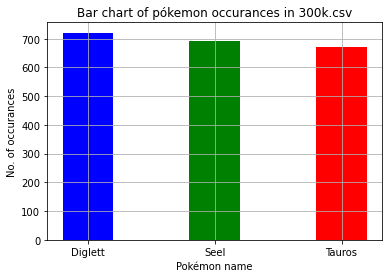

In [1472]:
# YOUR CODE HERE

# Count occurances of the classes, convert to dictionary for easy plotting
occur = filtered_df.groupby(['class']).size().to_dict()

# Extract values from dictionary, convert class id to pokémon name for plot
keys = [name_dict[key] for key in occur.keys()]
values = occur.values()

# Define unique color for the pokemons, supports up to 10 different pokemons at once
colors = ['#0000FF', '#008000', '#FF0000', '#00FFFF', '#FF00FF', '#FFFF00', '#000000', '#FFA07A', '#00CED1', '#800080'][0:len(keys)]

# Create bar chart and adding figure styles
plt.bar(keys, values, width=0.4, color=colors)
plt.xlabel("Pokémon name")
plt.ylabel("No. of occurances")
plt.title("Bar chart of pókemon occurances in 300k.csv")
plt.grid(True)
plt.show()

Is the dataset balanced?

**Your answer:** (fill in here)

I think the dataset is fairly balanced. Diglett occurse more than Tauros, but it is still rather even.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

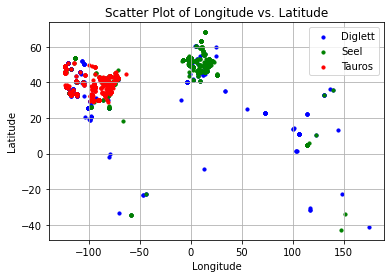

In [1473]:
# YOUR CODE HERE

# Create a dictionary that maps a pokemon to a specific color
pokemon_to_color_dict = {id: assigned_color for (id, assigned_color) in zip(pokemon_id, colors)}

# Iterate over the pokemon id and scatter all the locations that pokemon has appeared
for unique_pokemon_id in pokemon_id:
    mask = filtered_df['class'] == unique_pokemon_id
    temporary_df = filtered_df[mask]
    plt.scatter(temporary_df['longitude'], temporary_df['latitude'], c=pokemon_to_color_dict[unique_pokemon_id],label=name_dict[unique_pokemon_id], s=10)

# Add figure styles and show legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** (fill in here)

One could add the contour of the earth-map behind the scattered data points. It gives an intuition about where the pokemons is most likely to occur, however this does not give any additional insights with regards to the data distribution.

/ Nicholas Granlund

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** (fill in here)

Tauros and Seel are, according to the scatter, fairly easy to separate with some overlap. It seems like Tauros is more apparent in North America and that Seel is more present in Europe. Diglett however seems to appear all over the world, and hence it may be difficult to accurately locate/separate Digletts location.

/ Nicholas Granlund

Which accuracy do you expect to achieve?

**Your answer:** (fill in here)

Well that depens on the network implemented and on how well it has been trained. But I would suspect an OK accuracy, perhaps around 60-70%?

/ Nicholas Granlund

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [1474]:
# YOUR CODE HERE

# Our input to the network should be the coordinates longitude and latitude. Our output should be the class.
input = filtered_df[['longitude', 'latitude']].to_numpy()
output = filtered_df['class'].to_numpy()

# Perform normaliazation such that the input data have 0 mean and unit variance
mean_longitude, std_longitude = input[:, 0].mean(), input[:, 0].std()
mean_latitude, std_latitude = input[:, 1].mean(), input[:, 1].std()
input[:, 0] = (input[:, 0] - mean_longitude) / std_longitude
input[:, 1] = (input[:, 1] - mean_latitude) / std_latitude

# Assert that the variance is approximately 1
assert np.abs(input.std() - 1) < 1e-6, "Variance is not sufficiently close to 1"
assert np.abs(input.mean()) < 1e-6, "Mean is not sufficiently close to 0"

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [1475]:
# YOUR CODE HERE

# Convert 'output' to a PyTorch tensor
output_tensor = torch.tensor(output, dtype=torch.int64)

# Create a dictionary to map original class labels to new labels based on 'pokemon_id'
class_label_mapping = {}
unique_labels = torch.unique(output_tensor)

# Generate a mapping from unique original labels to consecutive integers
# So instead of classes beeing [50, 86 , 128] we instead get [0, 1, 2]
for label in unique_labels:
    original_label = label.item()
    new_label = pokemon_id.index(original_label)
    class_label_mapping[original_label] = new_label

# Map the original class labels to consecutive integers
for original_label, new_label in class_label_mapping.items():
    output_tensor[output_tensor == original_label] = new_label

# Now let's transform these to PyTorch 'Tensor'
input_tensor = torch.tensor(input, dtype=torch.float32)

# Now we can create a dataset of the input and output tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = TensorDataset(input_tensor.to(device), output_tensor.to(device))

# Split the data into 55 / 25 / 20
n_samples = len(dataset)
n_train_samples = int(n_samples*0.55)
n_val_samples = int(n_samples*0.25)
n_test_samples = int(n_samples - n_train_samples - n_val_samples)

# assert that the dataset has been split correctly
assert n_train_samples + n_val_samples + n_test_samples == n_samples, 'Dataset splitted incorrectly.'

# Use random_split function to obtain 3 subsets of the data.
train_dataset, val_dataset, test_dataset = random_split(dataset, [n_train_samples, n_val_samples, n_test_samples])

# Create DataLoader objects of these datasets
train_data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=n_val_samples)
test_data_loader = DataLoader(test_dataset, batch_size=n_test_samples)

# Now we have prepared the data for our network!

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [1476]:
# YOUR CODE HERE

# We use the nn module from Pytorch. We create out own class "PokemonLocatorNetwork"
# as a subclass of nn.Module. i.e., Our class will inherit the attributes and methods of this.
# In the __init__ constructor we will call super() to create an instance of the superclass.

# Our 'PokemonLocatorNetwork' will have a uniqe attribute we call self.model. This is an nn.Sequantial
# object that consists of several layer types.

# The 'PokemonLocatorNetwork' will also only have one unique method called forward. 
# This method accepts 'features' as arguments and passes it to the nn.Sequential object defined
# in the attribute self.model.

class PokemonLocatorNetwork(nn.Module):
    """
    A neural network model for Pokemon classification.

    This network consists of multiple layers with ReLU activation and batch normalization.

    Args:
        n_classes (int): Number of output classes.

    Attributes:
        model (nn.Sequential): The neural network architecture.
    """

    def __init__(self, n_classes: int):
        """
        Initializes a new instance of the ImprovedPokemonLocatorNetwork.

        Args:
            n_classes (int): Number of output classes.
        """
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),

            nn.Linear(16,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),

            nn.Linear(16,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Linear(16, n_classes),
        )

    def forward(self, features: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the neural network.

        Args:
            features (torch.Tensor): Input features.

        Returns:
            torch.Tensor: Output of the neural network.
        """
        return self.model(features)

Train the network.

In [1477]:
# Here we define two functions to help us in the training process; evaluate_model and train_network

def evaluate_model(data_loader: DataLoader, model: nn.Module, loss_fun: nn.modules.loss, print_result: bool = False) -> tuple[float, float]:
    """
    Evaluate a neural network model on a given data loader.

    Args:
        data_loader (DataLoader): DataLoader containing input data and labels.
        model (nn.Module): Neural network model to evaluate.
        loss_fun (nn.modules.loss): Loss function for computing the loss.
        print_result (bool): If True, print the accuracy and average loss.

    Returns:
        Tuple[float, float]: A tuple containing the accuracy and average loss.

    Author: Nicholas Granlund
    Date: 2023-09-10
    """

    # Initialize helper variables
    losses = []
    n_correct = 0

    # Do not allocate memory for gradients, reduce memory usage with torch.no_grad()
    with torch.no_grad():

        # Iterate through the data in the data_loader
        for batch_x, batch_y in data_loader:

            # Make prediction for batch_x
            pred = model.forward(batch_x)

            # Compute loss given the prediction
            loss = loss_fun(pred, batch_y)

            # Append this loss to the 'losses' list
            losses.append(loss.item())
            
            # Increment counter for the number of correctly classified labels.
            n_correct += torch.sum(pred.argmax(dim=1) == batch_y).item()

        # Compute Acccuracy
        accuracy = n_correct/len(data_loader.sampler)

        # Compute average loss from the batches
        avg_loss = sum(losses)/len(losses)    

    if print_result:
        print(f"Accuracy: {accuracy*100:.2f}%")
        print(f"Average Loss: {avg_loss:.3f}")
    
    # Return the accuracy and average loss
    return accuracy, avg_loss


def train_network(train_data_loader: DataLoader, val_data_loader: DataLoader, model: nn.Module, loss_fun: nn.modules.loss, optimizer: torch.optim, n_epochs: int = 200, early_stop: bool = True):
    """
    Train a neural network model for classification.

    This function trains a neural network model using the specified training DataLoader and optimization settings.
    
    Args:
        train_data_loader (DataLoader): DataLoader containing training data and labels.
        val_data_loader (DataLoader): DataLoader containing validation data and labels.
        model (nn.Module): Neural network model to be trained.
        loss_fun (nn.modules.loss): Loss function used for training.
        optimizer (torch.optim): Optimization algorithm and its parameters.
        n_epochs (int, optional): Number of training epochs. Default is 10.
        early_stop (bool, optional): Boolean if the training should stop early. Default is True

    Returns:
        No returns

    Author: Nicholas Granlund
    Date: 2023-09-10

    This function performs the following steps:
    - Iterates through the specified number of training epochs.
    - Computes forward and backward passes, updating the model's parameters.
    - Displays training and validation metrics for each epoch.
    - Terminates training early if validation loss does not decrease
    """

    # Initialize helper variables
    best_val_loss = float('inf')  # Initialize to a large value
    patience = 5  # Number of epochs without improvement to tolerate
    no_improvement = 0  # Counter for consecutive epochs without improvement

    # Train the network for the given amount of epochs
    for epoch in range(n_epochs):

        losses = []
        n_correct = 0

        # Iterate through the batches the training DataLoader
        for batch_x, batch_y in train_data_loader:
            
            # Compute predictions
            pred = model(batch_x)
            
            # Compute the loss using CrossEntropyLoss
            loss = loss_fun(pred, batch_y)
            losses.append(loss.item())
            
            # Increment the number of correct predictions
            n_correct += torch.sum(pred.argmax(dim=1) == batch_y).item()

            # Backpropagate
            loss.backward()

            # Perform a single optimization step (parameter update)
            optimizer.step()

            # Sets the gradients of all optimized Tensors to zero
            optimizer.zero_grad()
            
        # Compute accuracy and loss on the entire training set
        train_accuracy = n_correct / len(train_dataset)
        train_avg_loss = sum(losses) / len(losses)

        # Compute accuracy and loss on the validation set
        val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fun)

        # Display metrics for the current epoch
        print(f"\n------ Epoch [{epoch+1}/{n_epochs}] -------------------------------------")
        print(f"Training Loss:   {train_avg_loss:<8.3f} |   Training Accuracy:   {train_accuracy*100:.2f}%")
        print(f"Validation Loss: {val_avg_loss:<8.3f} |   Validation Accuracy: {val_accuracy*100:.2f}%\n")

        if early_stop:
            # Check if the validation loss improves
            if val_avg_loss < best_val_loss:
                best_val_loss = val_avg_loss
                no_improvement = 0  # Reset the patience counter
            else:
                no_improvement += 1  # No improvement in validation loss
            
            # Check if the patience counter exceeds the predefined threshold
            if no_improvement >= patience:
                print('\nValidation loss has not improved for {} epochs.\nTerminating training to avoid overfitting.\n'.format(patience))
                break

    # Print
    print("Training complete.")

In [1478]:
# YOUR CODE HERE

# Create our NN object with the correct number of output classes
model = PokemonLocatorNetwork(len(pokemon_id))

# I only have a CPU available on my machine, so I will send the model there
model.to(device)

# Define a loss function, we use CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

# Choose the Adam optimizer, tune learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train our model
train_network(train_data_loader, val_data_loader, model, loss_function, optimizer, early_stop=True)



------ Epoch [1/200] -------------------------------------
Training Loss:   0.976    |   Training Accuracy:   55.37%
Validation Loss: 0.944    |   Validation Accuracy: 59.81%


------ Epoch [2/200] -------------------------------------
Training Loss:   0.893    |   Training Accuracy:   65.41%
Validation Loss: 0.883    |   Validation Accuracy: 66.54%


------ Epoch [3/200] -------------------------------------
Training Loss:   0.851    |   Training Accuracy:   65.24%
Validation Loss: 0.843    |   Validation Accuracy: 64.81%


------ Epoch [4/200] -------------------------------------
Training Loss:   0.802    |   Training Accuracy:   67.25%
Validation Loss: 0.813    |   Validation Accuracy: 68.46%


------ Epoch [5/200] -------------------------------------
Training Loss:   0.780    |   Training Accuracy:   68.65%
Validation Loss: 0.790    |   Validation Accuracy: 70.58%


------ Epoch [6/200] -------------------------------------
Training Loss:   0.760    |   Training Accuracy:   70.2

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [1479]:
# YOUR CODE HERE
model.eval()
test_accuracy, test_avg_loss = evaluate_model(test_data_loader, model, loss_fun, print_result=True)

Accuracy: 71.77%
Average Loss: 0.756


Compute the confusion matrix of your predictions on the test set.

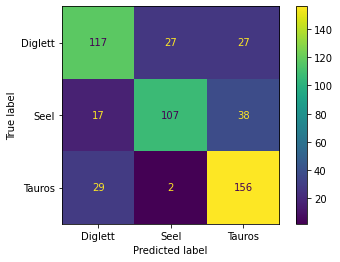

In [1480]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize helper variables
all_predictions = []
all_ground_truth = []

with torch.no_grad():
    for batch_x, batch_y in val_data_loader:
        # Forward pass to get predictions
        predictions = model(batch_x)
        _, predicted_labels = torch.max(predictions, dim=1)

        all_predictions.extend(predicted_labels.cpu().numpy())
        all_ground_truth.extend(batch_y.cpu().numpy())

# Create the confusion matrix using scikit-learn
confusion = confusion_matrix(all_ground_truth, all_predictions)
disp = ConfusionMatrixDisplay(confusion, display_labels=pokemon_names)
disp.plot()

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** (fill in here)

We can see that the biggest confusion occurs between Seel / Tauros. Furthermore we can also see that there is slight confusion between all classes. The confusion matrix more or less confirms what we suspected to occur, that it would be difficult to separate Seel/Tauros.

The best scenario would be if only the diagonal of the confusion matrix has non-zero values, then we would have a perfect network

/Nicholas Granlund

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

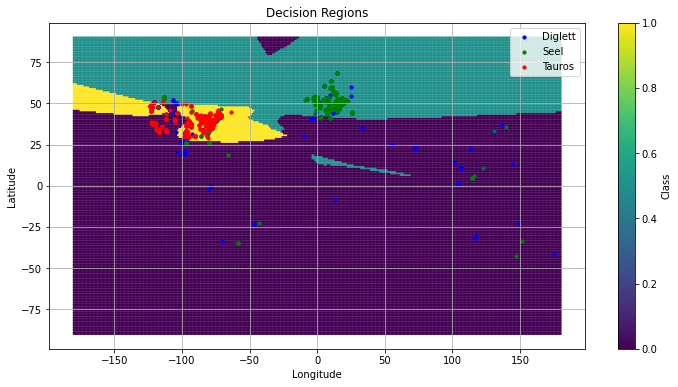

In [1481]:
# YOUR CODE HERE

# Define the range of longitudes and latitudes for your grid
lon_range = np.linspace(-180, 180, num=360)
lat_range = np.linspace(-90, 90, num=180)

# Create a meshgrid of coordinates
lon_mesh, lat_mesh = np.meshgrid(lon_range, lat_range)

# Stack the lon_mesh and lat_mesh to get 2D arrays of coordinates
coordinates = np.stack((lon_mesh, lat_mesh), axis=-1).reshape(-1, 2)

# Perform normalization
coordinates[:, 0] = (coordinates[:, 0] - mean_longitude) / std_longitude
coordinates[:, 1] = (coordinates[:, 1] - mean_latitude) / std_latitude

# Convert the NumPy array to a torch.Tensor
coordinates_tensor = torch.tensor(coordinates, dtype=torch.float32)

# Apply your trained network to the grid
with torch.no_grad():
    predictions = model(coordinates_tensor.view(-1, 2)).argmax(dim=1).numpy()

# Reshape the predictions to match the grid shape
predictions = predictions.reshape(lon_mesh.shape)

# Create a scatter plot to visualize the decision regions
plt.figure(figsize=(12, 6))
plt.scatter(lon_mesh, lat_mesh, c=predictions, cmap='viridis', s=1)

# Add the pokemon data points
for unique_pokemon_id in pokemon_id:
    mask = filtered_df['class'] == unique_pokemon_id
    temporary_df = filtered_df[mask]
    plt.scatter(temporary_df['longitude'], temporary_df['latitude'], c=pokemon_to_color_dict[unique_pokemon_id],label=name_dict[unique_pokemon_id], s=10)

# Add plot styles
plt.colorbar(label='Class')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Decision Regions')
plt.legend()
plt.grid()
plt.show()


Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** (fill in here)

It did meet my expectations to some degree. I expected the region for Tauros to be difficult to classify, which this decision region implies. 
However I initially also expected the soutern parts of the map to be better classified. But after further reflection, this area is not covered by as many data points so it
makes sense that the decision region is not as accurate here.

/Nicholas Granlund

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** (fill in here)

I would start of with going to Latitude 45°N Longitude 90°W,  which is the state of Winsconsin in the US. Here i would expect to find Tauros. Meanwhile there is a slight probability that i also will find Diglett so I wouldn'ät have to explicitly search for that pokemon.

Next, I would travel to Latitude 55°N Longitude 10°E to capture Seel.

/Nicholas Granlund

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** (fill in here)

I know that some pokemons only appear during certain times of the day and during different weather conditions.

For example: Gastly, Haunter and Gengar are Ghost-type pokemons and are most likely to appear during nighttime. Furthermore, Vaporeon is a water-normal pokemon that appear close to bodies of water, or further in on land when the weather is rainy. In rainy weather we also suspect to stuble upon fewer flying type pokemons. 

Hence it would be beneficial to not only oconsider the position of the pokemon sightings, but also the time of day and the weather at the location.

/Nicholas Granlund



To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

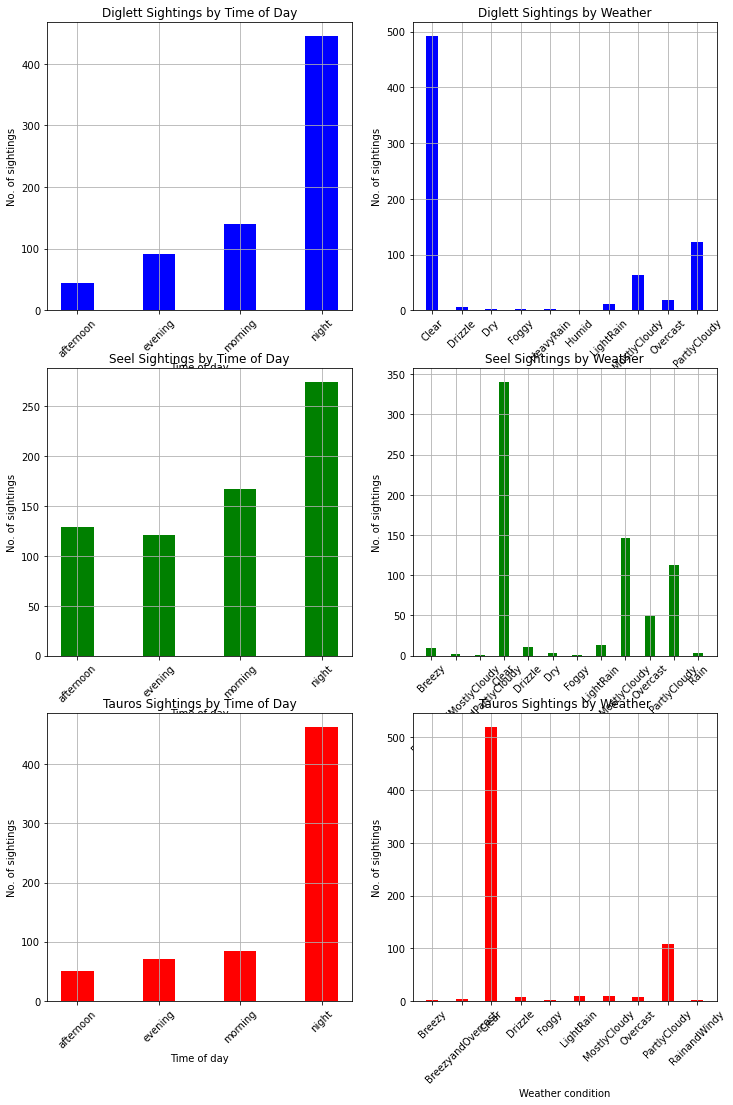

In [1482]:
# YOUR CODE HERE

# Lets start of with sorting the DataFrame once again
columns = ['appearedTimeOfDay', 'weather', 'class']
new_df = df[columns]
mask = new_df['class'].isin(pokemon_id)
ext_filtered_df = new_df[mask]

# Calculate the number of rows and columns for the subplots
num_rows = len(pokemon_id)
num_cols = 2  

# Create a new figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Lets create histograms for Diglett
for i, unique_pokemon_id in enumerate(pokemon_id):

    # Create mask that extracts the data for the given pokemon
    mask = ext_filtered_df['class'] == unique_pokemon_id

    # Extact the data to temporary DataFrame
    diglett_df = ext_filtered_df[mask]

    # Count occurances
    occur_time = diglett_df.groupby(['appearedTimeOfDay']).size().to_dict()
    occur_weather = diglett_df.groupby(['weather']).size().to_dict()

    # Create the first subplot (histogram for 'appearedTimeOfDay')
    ax1 = axes[i, 0]
    ax1.bar(occur_time.keys(), occur_time.values(), width=0.4, color=pokemon_to_color_dict[unique_pokemon_id])
    ax1.set_xlabel("Time of day")
    ax1.set_ylabel("No. of sightings")
    ax1.set_title(f"{name_dict[unique_pokemon_id]} Sightings by Time of Day")
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)

    # Create the second subplot (histogram for 'weather')
    ax2 = axes[i, 1]
    ax2.bar(occur_weather.keys(), occur_weather.values(), width=0.4, color=pokemon_to_color_dict[unique_pokemon_id])
    ax2.set_xlabel("Weather condition")
    ax2.set_ylabel("No. of sightings")
    ax2.set_title(f"{name_dict[unique_pokemon_id]} Sightings by Weather")
    ax2.grid(True)
    ax2.tick_params(axis='x', rotation=45)

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** (fill in here)

In short, the data tells us that the pokemons are more likely to appear during the night and clear weather which should be considiered while on the hunt after these pokemons.

Furthermore, it would be beneficial to add these features into the network, by doing so we could hypotethically imporve the accurcy of the network since we consider more features that may not overlap. At this time, only the locations of the pokemons is considered as features for the network, and evidently the location overlap at north America, however this issue may be resolved somehwat by also considering the time of day the pokemons are sighted. Perhaps Tauros is only present in north america during the night, and Diglett is present at the same location, but at different times of day. Using the time of day as a feature might resolve the issue of difficult classification in these areas.

/Nicholas Granlund



The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** (fill in here)

PROS: 
- Obtain precise location as output with highest probabilty. input is pokemon name and output is best location.
- A regression model would be more flexible for the amount of inputs, so it can consider multiple pokemon species.

CONS:
- The regression model could be rather sensitive to errors which can lead to laerge deviations in predicted locations
- Due to the size of the data, the model would be more prone to overfitting.

/Nicholas Granlund

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [1483]:
# YOUR CODE HERE